In [2]:
import json
import pandas as pd

# JSON 파일 로드
file_path_2016 = "../data/0310/results/2016_avg.json"
file_path_2020 = "../data/0310/results/2020_avg.json"
file_path_2023 = "../data/0310/results/2023_avg.json"

with open(file_path_2016, "r", encoding="utf-8") as file:
    data_2016 = json.load(file)

with open(file_path_2020, "r", encoding="utf-8") as file:
    data_2020 = json.load(file)

with open(file_path_2023, "r", encoding="utf-8") as file:
    data_2023 = json.load(file)

# 데이터프레임 변환
df_2016 = pd.DataFrame(data_2016)
df_2020 = pd.DataFrame(data_2020)
df_2023 = pd.DataFrame(data_2023)

# avg_sentiment_score를 숫자로 변환 (NaN 값 제거)
df_2016["avg_sentiment_score"] = pd.to_numeric(df_2016["avg_sentiment_score"], errors="coerce")
df_2020["avg_sentiment_score"] = pd.to_numeric(df_2020["avg_sentiment_score"], errors="coerce")
df_2023["avg_sentiment_score"] = pd.to_numeric(df_2023["avg_sentiment_score"], errors="coerce")

# 분기별 상세 통계
detailed_stats_2016 = df_2016.groupby("quarter")["avg_sentiment_score"].describe()
detailed_stats_2016["Year"] = 2016
detailed_stats_2020 = df_2020.groupby("quarter")["avg_sentiment_score"].describe()
detailed_stats_2020["Year"] = 2020
detailed_stats_2023 = df_2023.groupby("quarter")["avg_sentiment_score"].describe()
detailed_stats_2023["Year"] = 2023

# 결과를 하나의 데이터프레임으로 합치기
detailed_comparison = pd.concat([detailed_stats_2016, detailed_stats_2020,detailed_stats_2023]).reset_index()
print(detailed_comparison)



   quarter  count      mean       std       min       25%       50%       75%  \
0   2016Q1   29.0 -0.992635  0.749716 -3.100000 -1.328333 -1.030000 -0.362500   
1   2016Q2    8.0 -1.223958  0.441331 -1.900000 -1.500000 -1.085000 -0.889167   
2   2016Q3   42.0 -1.482727  0.825725 -2.928571 -2.137500 -1.360000 -0.936667   
3   2016Q4   23.0 -1.122068  0.516055 -2.140000 -1.516667 -1.233333 -0.627500   
4   2020Q1    5.0 -1.087667  0.309876 -1.540000 -1.265000 -0.933333 -0.925000   
5   2020Q3    4.0 -0.927333  0.388932 -1.446000 -1.111500 -0.840000 -0.655833   
6   2020Q4    1.0 -0.600000       NaN -0.600000 -0.600000 -0.600000 -0.600000   
7   2023Q1   20.0 -1.341758  0.637494 -2.550000 -1.819167 -1.313333 -0.962500   
8   2023Q2   35.0 -1.429959  0.742751 -2.925000 -2.087500 -1.415000 -0.818214   
9   2023Q3   86.0 -1.267406  0.716688 -2.650000 -1.693750 -1.220000 -0.827500   
10  2023Q4   22.0 -1.027242  0.766424 -2.825000 -1.447500 -0.867500 -0.553750   

         max  Year  
0   0.

In [6]:
detailed_comparison

,quarter,count,mean,std,min,25%,50%,75%,max,Year
0,2016Q1,29.0,-0.992635,0.749716,-3.100000,-1.328333,-1.030000,-0.362500,0.375000,2016
1,2016Q2,8.0,-1.223958,0.441331,-1.900000,-1.500000,-1.085000,-0.889167,-0.765000,2016
2,2016Q3,42.0,-1.482727,0.825725,-2.928571,-2.137500,-1.360000,-0.936667,0.392500,2016
3,2016Q4,23.0,-1.122068,0.516055,-2.140000,-1.516667,-1.233333,-0.627500,-0.190000,2016
4,2020Q1,5.0,-1.087667,0.309876,-1.540000,-1.265000,-0.933333,-0.925000,-0.775000,2020
5,2020Q3,4.0,-0.927333,0.388932,-1.446000,-1.111500,-0.840000,-0.655833,-0.583333,2020
6,2020Q4,1.0,0.125000,NaN,0.125000,0.125000,0.125000,0.125000,0.125000,2020
7,2023Q1,20.0,-1.341758,0.637494,-2.550000,-1.819167,-1.313333,-0.962500,-0.192500,2023
8,2023Q2,35.0,-1.429959,0.742751,-2.925000,-2.087500,-1.415000,-0.818214,0.100000,2023
9,2023Q3,86.0,-1.267406,0.716688,-2.650000,-1.693750,-1.220000,-0.827500,0.670000,2023


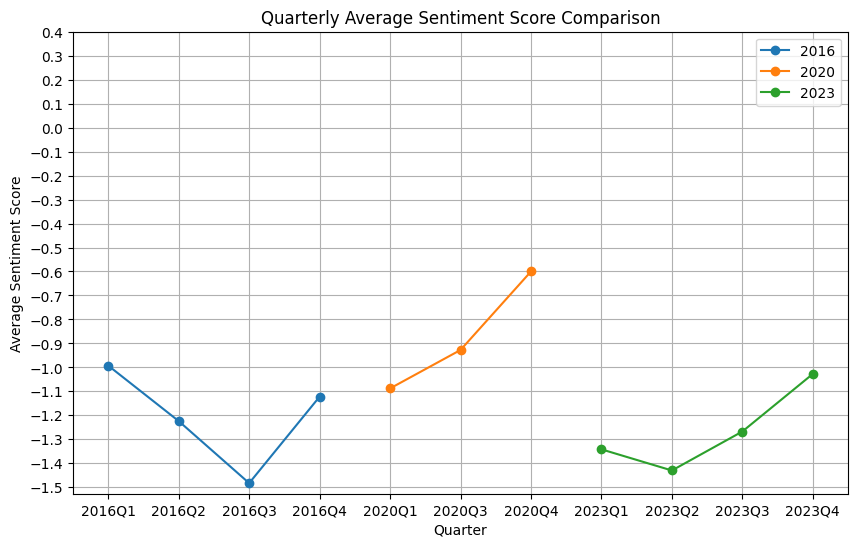

In [26]:
import matplotlib.pyplot as plt

def plot_quarterly_sentiment(detailed_stats_2016, detailed_stats_2020, detailed_stats_2023):
    plt.figure(figsize=(10, 6))

    for year, data in zip([2016, 2020, 2023], [detailed_stats_2016, detailed_stats_2020, detailed_stats_2023]):
        plt.plot(data.index, data["mean"], marker='o', label=f"{year}")

    plt.xlabel("Quarter")
    plt.ylabel("Average Sentiment Score")
    plt.title("Quarterly Average Sentiment Score Comparison")
    plt.legend()
    plt.grid(True)
    plt.yticks(ticks=[i/10 for i in range(-15, 5)])  # Y축 간격 조정
    plt.show()

# 예제 사용 (detailed_stats_2016, detailed_stats_2020, detailed_stats_2023 데이터프레임이 있어야 함)
plot_quarterly_sentiment(detailed_stats_2016, detailed_stats_2020, detailed_stats_2023)

In [12]:
detailed_stats_2016

,count,mean,std,min,25%,50%,75%,max,Year
quarter,,,,,,,,,
2016Q1,29.0,-0.992635,0.749716,-3.100000,-1.328333,-1.030000,-0.362500,0.3750,2016
2016Q2,8.0,-1.223958,0.441331,-1.900000,-1.500000,-1.085000,-0.889167,-0.7650,2016
2016Q3,42.0,-1.482727,0.825725,-2.928571,-2.137500,-1.360000,-0.936667,0.3925,2016
2016Q4,23.0,-1.122068,0.516055,-2.140000,-1.516667,-1.233333,-0.627500,-0.1900,2016


In [19]:

# 연도별 상세 통계
yearly_stats_2016 = df_2016["avg_sentiment_score"].describe()
yearly_stats_2016["Year"] = 2016
yearly_stats_2020 = df_2020["avg_sentiment_score"].describe()
yearly_stats_2020["Year"] = 2020
yearly_stats_2023 = df_2023["avg_sentiment_score"].describe()
yearly_stats_2023["Year"] = 2023

# 결과를 하나의 데이터프레임으로 합치기
yearly_comparison = pd.DataFrame([yearly_stats_2016, yearly_stats_2020, yearly_stats_2023])
yearly_comparison

,count,mean,std,min,25%,50%,75%,max,Year
avg_sentiment_score,102.0,-1.241766,0.741190,-3.100,-1.64600,-1.233333,-0.75000,0.3925,2016.0
avg_sentiment_score,10.0,-0.902267,0.479300,-1.540,-1.19875,-0.929167,-0.70375,0.1250,2020.0
avg_sentiment_score,163.0,-1.279019,0.723316,-2.925,-1.80000,-1.250000,-0.80000,0.6700,2023.0


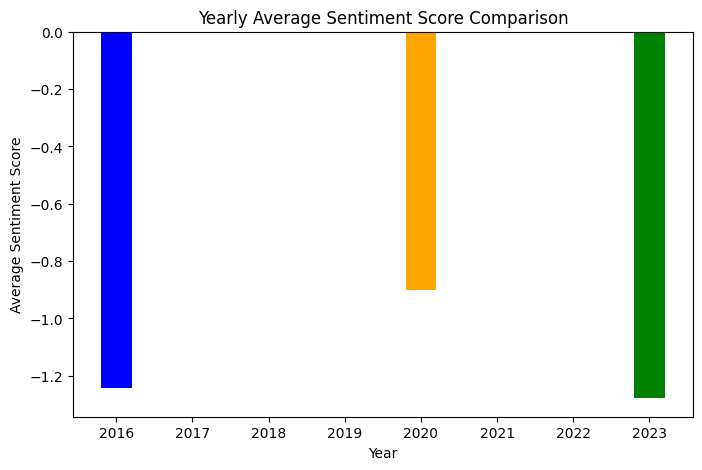

In [22]:
# 연도별 평균 감성 점수 시각화 (막대그래프)
plt.figure(figsize=(8, 5))
plt.bar(yearly_comparison["Year"], yearly_comparison["mean"], color=['blue', 'orange', 'green'], width=0.4)
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("Yearly Average Sentiment Score Comparison")
plt.grid(False)  # 배경 실선 제거
plt.show()

In [5]:
# 그래프 출력 함수
import matplotlib.pyplot as plt
def plot_quarterly_sentiment(detailed_stats_2016,detailed_stats_2020, detailed_stats_2023):
    plt.figure(figsize=(10, 6))

    for year, data in zip([2016,2020,2023], [detailed_stats_2016,detailed_stats_2020, detailed_stats_2023]):
        data_sorted = data.sort_values("quarter")
        data_sorted['quarter_numeric'] = data_sorted['quarter'].str.extract('(\d)$').astype(int)
        plt.plot(data_sorted['quarter_numeric'], data_sorted["mean"], marker='o', label=f"{year}")

    plt.xlabel("Quarter")
    plt.ylabel("Average Sentiment Score")
    plt.title("Quarterly Average Sentiment Score Comparison")
    plt.legend()
    plt.grid(True)
    plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.show()

# 그래프 출력
plot_quarterly_sentiment(detailed_stats_2016,detailed_stats_2020, detailed_stats_2023)

KeyError: 'quarter'

<Figure size 1000x600 with 0 Axes>

In [4]:
detailed_stats_2016

,count,mean,std,min,25%,50%,75%,max,Year
quarter,,,,,,,,,
2016Q1,29.0,-0.992635,0.749716,-3.100000,-1.328333,-1.030000,-0.362500,0.3750,2016
2016Q2,8.0,-1.223958,0.441331,-1.900000,-1.500000,-1.085000,-0.889167,-0.7650,2016
2016Q3,42.0,-1.482727,0.825725,-2.928571,-2.137500,-1.360000,-0.936667,0.3925,2016
2016Q4,23.0,-1.122068,0.516055,-2.140000,-1.516667,-1.233333,-0.627500,-0.1900,2016
